This File will load the pretrained model which will be evaluated and potentially fine-tuned if I believe the results can be improved

Firstly, I will be installing the ultralytics - we can use pip to install ultralytics write the following in your terminal

pip install ultralytics

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import cv2
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

configure the appearance of seaborn plots

In [2]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [10]:
import os
print("Current directory:", os.getcwd())
print("Dataset exists?", os.path.exists('Dataset'))

Current directory: c:\Object_Detection_Projects\vehicle_detection\Vehicle_Detection_Code
Dataset exists? False


Loading the model

C:\Users\Guest1\.ultralytics\ultralytics\nn\tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



image 1/1 c:\Object_Detection_Projects\vehicle_detection\Vehicle_Detection_Code\..\Dataset\sample_image.jpg: 384x640 5 cars, 65.0ms
Speed: 3.0ms preprocess, 65.0ms inference, 868.7ms postprocess per image at shape (1, 3, 384, 640)


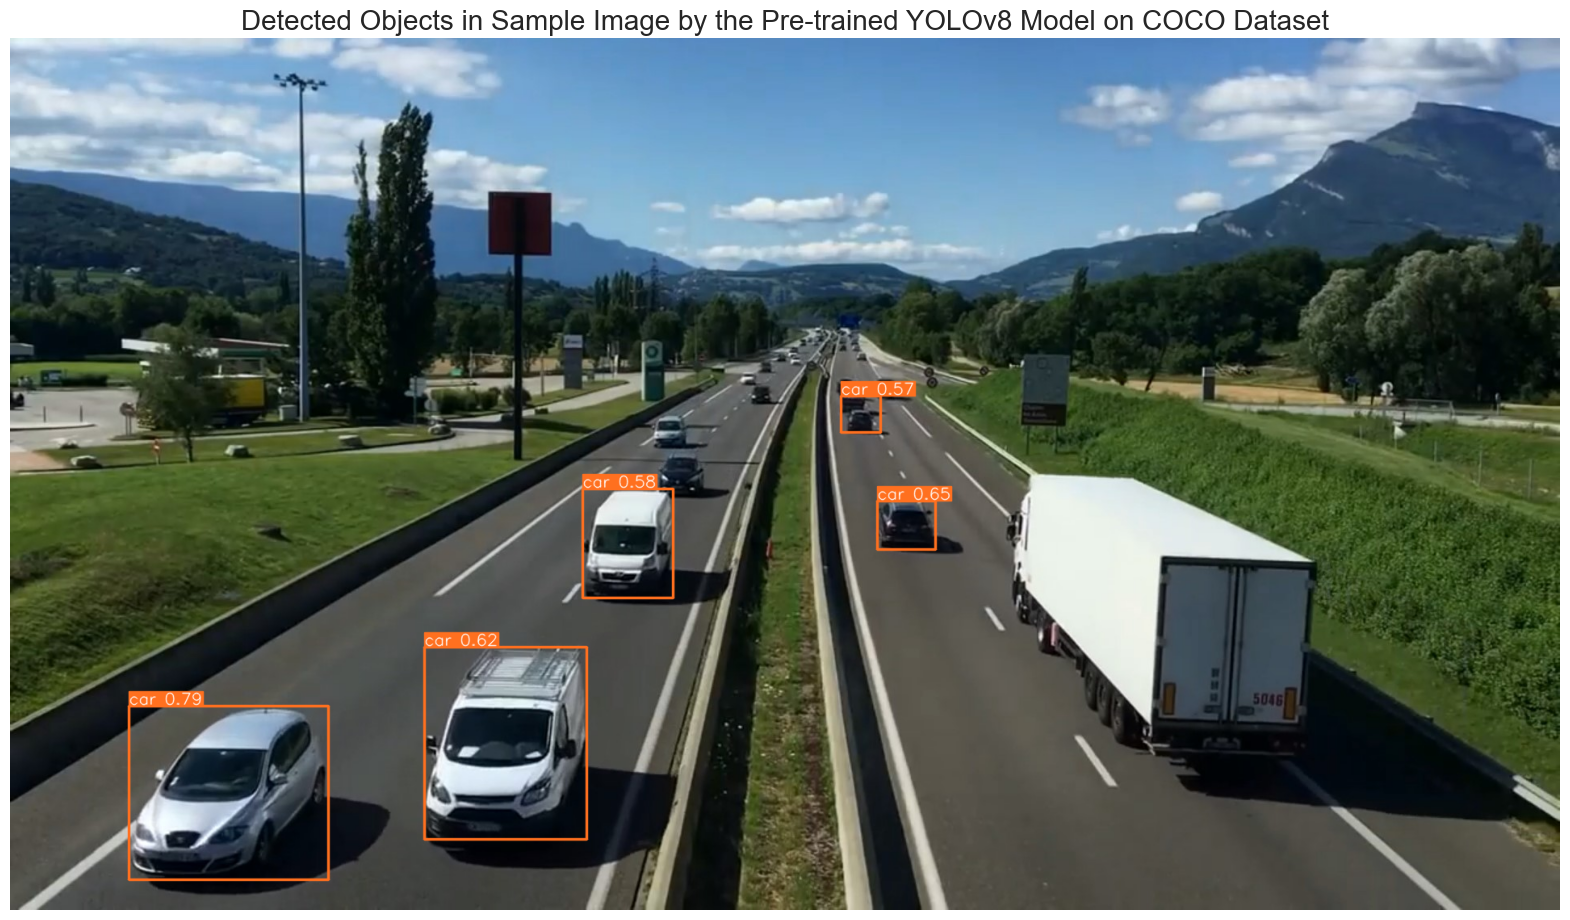

In [ ]:
# Load the model
model = YOLO("yolov8n")

# Path to the image file
image_path = '../Dataset/sample_image.jpg'
# Perform inference on the provided image(s)
results = model.predict(source=image_path, 
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()